%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

import warnings
warnings.filterwarnings('ignore')

In [35]:
housing = pd.read_csv("kc_house_data.csv")
housing

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [18]:
housing['price'] = housing['price'].astype('int64')

In [19]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [20]:
housing.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<AxesSubplot:>

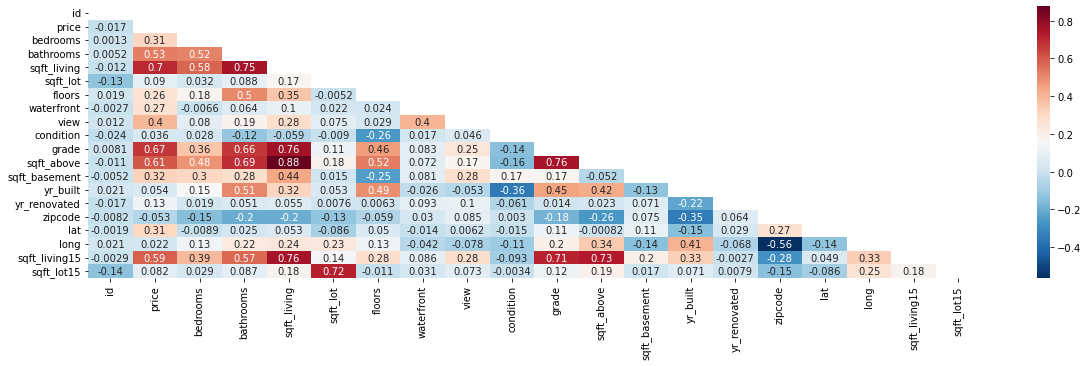

In [79]:
mask = np.zeros_like(housing.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,5))
sns.heatmap(housing.corr(),cmap='RdBu_r',mask=mask, annot=True)

### Assumption 
Based on general assumption, the more bedrooms, floors and bathroom, more is the price of that house.

### Result 
From the graph, we can see that house with 7 bedrooms, 1.5 floors and 1.5 bathrooms after that price of the house starts reducing.

<AxesSubplot:xlabel='bedrooms,floors,bathrooms'>

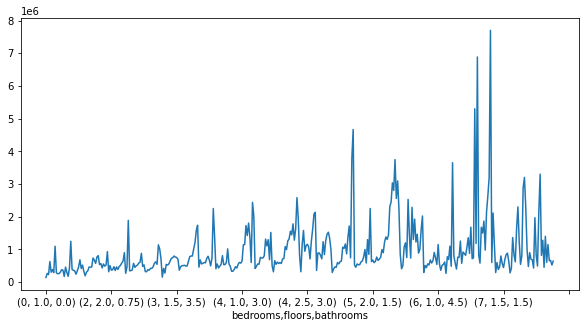

In [76]:
bed_price = housing.groupby(['bedrooms','floors','bathrooms'])['price'].mean().plot(kind='line', figsize=[10, 5])
bed_price

### Assumption 
Newly built and renovated house have hightes price.

### Result 
The houses built between 1930 - 1940 have highest price and then it decreases till 2015 and then again there is pick in price.
newly renovated houses have high price but decrease for the house renovated after 2008

In [33]:
year_price = housing.groupby(['yr_built'])['price'].mean()
reno_price = housing.groupby(['yr_renovated'])['price'].mean()
reno_price

yr_renovated
0       530360.818155
1934    459950.000000
1940    378400.000000
1944    521000.000000
1945    398666.666667
            ...      
2011    607496.153846
2012    625181.818182
2013    664663.513514
2014    654756.252747
2015    658843.750000
Name: price, Length: 70, dtype: float64

Text(0.5, 1.0, 'House price by renovated year')

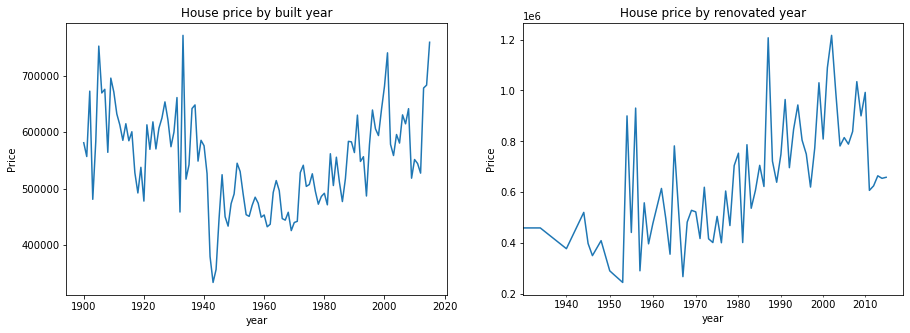

In [81]:
fig,axs = plt.subplots(1, 2, figsize=(15,5), sharex=False, sharey=False)
plt.sca(axs[0])
year_price.plot(kind = 'line')
axs[0].set_ylabel('Price')
axs[0].set_xlabel('year')
axs[0].set_title('House price by built year')

plt.sca(axs[1])
reno_price.plot(kind = 'line')
axs[1].set_ylabel('Price')
axs[1].set_xlabel('year')
axs[1].set_xscale('log',base = 10)
axs[1].xaxis.set_minor_formatter(mticker.ScalarFormatter())
axs[1].set_title('House price by renovated year')

### Assumption 
Larger the living area , more is the price of the house 

### Result 
From the graph it seems that living is direclty proportional to the price but after limit there is dractic decrease in price with increase in living area

<AxesSubplot:xlabel='sqft_living'>

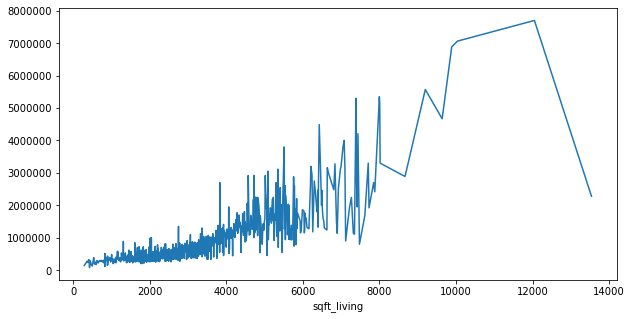

In [68]:
living_price = housing.groupby(['sqft_living'])['price'].mean().plot(kind='line', figsize=[10, 5])
plt.ticklabel_format(style='plain')
living_price

### Assumption 
Larger the lot area higher is the price

### Result 
Our assumption is wrong here, to see which other factor is affecting the price there's associated id number for that house.

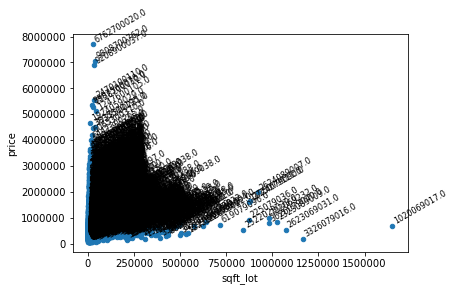

In [17]:
ax = housing.plot.scatter(x='sqft_lot', y='price')
plt.ticklabel_format(style='plain')
points = housing[['sqft_lot','price','id']]
_ = points.apply(
    lambda x: ax.text(*x, rotation=30, horizontalalignment='left', verticalalignment='bottom', fontsize=8), axis=1)
plt.show()

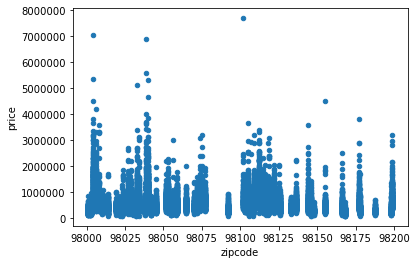

In [27]:
housing.plot.scatter(x='zipcode', y='price')
plt.ticklabel_format(style='plain')

### Assumption 
House with good view and having waterfront are higher in cost.

### Result 
The house with waterfront and having view ranked as 2 is having high prices, not the one ranked 4.

<AxesSubplot:xlabel='waterfront'>

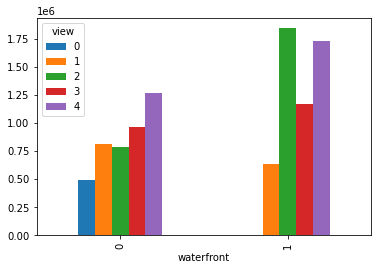

In [12]:
view = housing.groupby(['waterfront','view'])['price'].mean().unstack().plot.bar()
view

### Assumption 
House which are in good condition are high in price.

### Result 
Our assumption is correct here

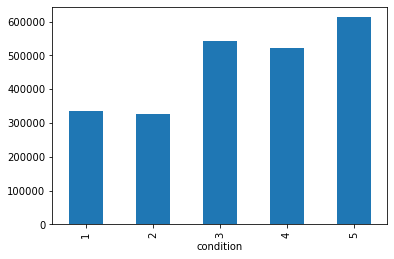

In [20]:
condition = housing.groupby(['condition'])['price'].mean().plot.bar()

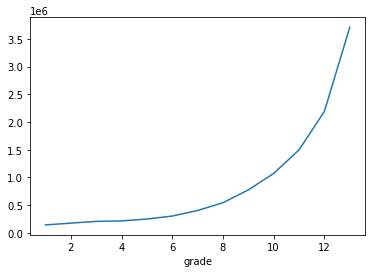

In [22]:
grade = housing.groupby(['grade'])['price'].mean().plot.line()

### Assumption 
More the area, higher is the price.

### Result 
From the graph we can see that there's been expoential increae in price with increase in area, but drops down after certain area may be location of that came into account here.

In [23]:
above_price = housing.groupby(['sqft_above'])['price'].mean()
basement_price = housing.groupby(['sqft_basement'])['price'].mean()

Text(0.5, 1.0, 'House price by area for basement')

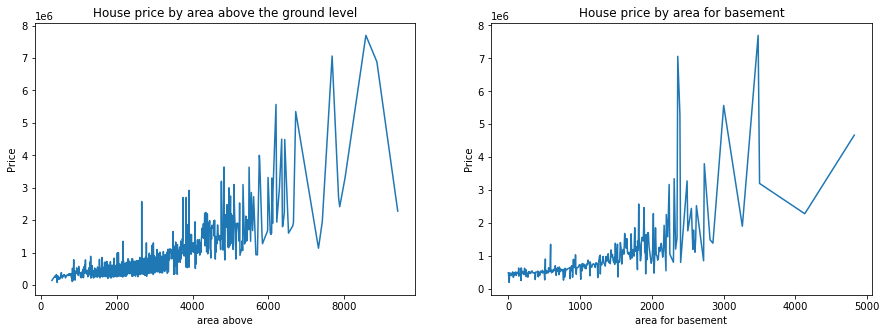

In [38]:
fig,axs = plt.subplots(1, 2, figsize=(15,5), sharex=False, sharey=False)
plt.sca(axs[0])
above_price.plot(kind = 'line')
axs[0].set_ylabel('Price')
axs[0].set_xlabel('area above')
axs[0].set_title('House price by area above the ground level')

plt.sca(axs[1])
basement_price.plot(kind = 'line')
axs[1].set_ylabel('Price')
axs[1].set_xlabel('area for basement')
axs[1].set_title('House price by area for basement')

### Conclusion 
Based on our analysis, we can say that house pricing depends on lot, living area and the quality of house.